# Calcul Numeric - Laborator 4 - Data Visualization II

### Obiectiv

În acest laborator vom învăța cum să creăm animații și să automatizăm preprocesarea și vizualizarea datelor cu dezvoltarea GUI.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Requirements
Pentru a lucra cu animații ai nevoie de IPython. Îl vei putea instala folosind următoarea comandă:

In [2]:
!pip install ipympl

În caz că întâmpini erori la executarea animațiilor, încearcă sa faci update la matplotlib sau la Python.

## Animații

### ``FuncAnimation``

Clasa `~matplotlib.animation.FuncAnimation` ne permite să creăm o animație prin furnizarea unei funcții care modifică iterativ datele unui grafic. Acest lucru se realizează prin utilizarea metodelor *setter* pe diverse obiecte `~matplotlib.artist.Artist` (exemple: `~matplotlib.lines.Line2D`, `~matplotlib.collections.PathCollection`, etc.). Un obiect obișnuit `~matplotlib.animation.FuncAnimation` primește un `~matplotlib.figure.Figure` pe care dorim să-l animăm și o funcție *func* care modifică datele desenate pe figură. Se folosește parametrul *frames* pentru a determina durata animației (numărul de cadre). Parametrul *interval* este folosit pentru a determina timpul în milisecunde între desenarea a două cadre. Pentru a creea o animație cu `.FuncAnimation` se urmează următorii pași:

- Se desenează figura inițială, incluzând toate obiectele necesare de tip artist (îi vom numi artiști, e.g. lines, scatter plots). Salvează toți artiștii în variabile astfel încât să poată fi actualizați ulterior în timpul animației.
- Se creează o funcție care actualizează datele din fiecare artist pentru a genera noul cadru la fiecare apel al funcției.
- Se creează un obiect `.FuncAnimation` cu `.Figure` și funcția de la pasul anterior, împreună cu argumentele cheie care determină proprietățile animației.
- Se folosește `.animation.Animation.save` sau `.pyplot.show` pentru a salva sau afișa animația.

  
https://matplotlib.org/stable/users/explain/animations/animations.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation

### Un simplu exemplu - animație de zgomot

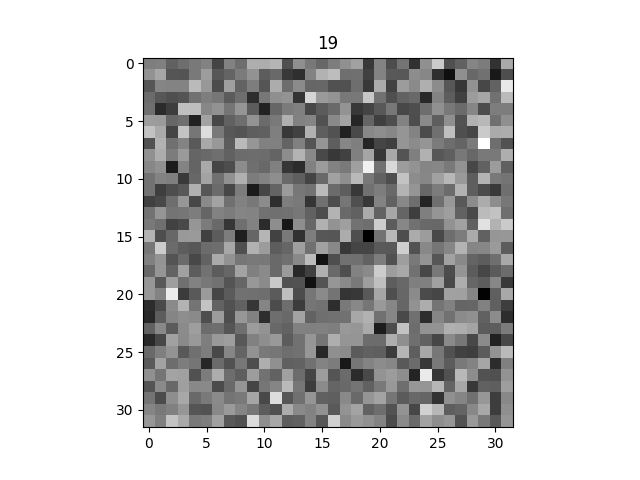

In [3]:
import matplotlib.animation as animation
%matplotlib widget

fig, ax = plt.subplots()

def update(frame):
    # generăm zgomot aleator folosind o distribuție normală
    noise = np.random.normal(size=(32, 32)) 
    # actualizăm imaginea
    im = ax.imshow(noise, cmap='binary')
    ax.set_title(frame)

    return im


ani = animation.FuncAnimation(fig=fig, func=update, frames=20, interval=30, repeat=False) 
# 20 de frame-uri, fiecare frame se afișează la un interval de 30 ms dupa cel precedent
ani.save('./animatie.gif')
plt.show()

### Animație cu lansarea unui proiectil cu diferite viteze

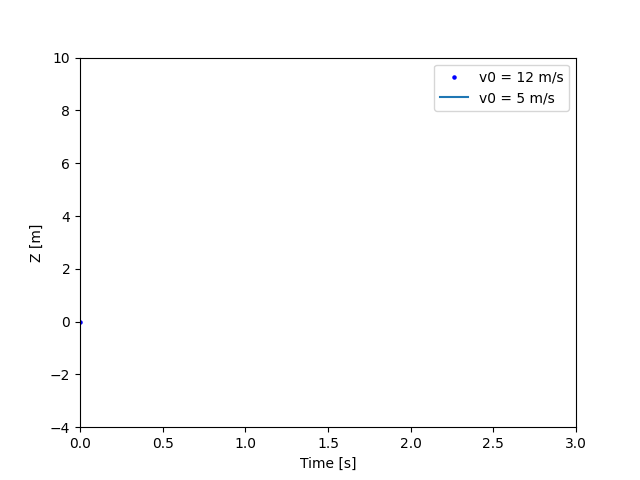

In [4]:

fig2, ax2 = plt.subplots()  # folosim alt nume de variabilă pentru fig și ax pentru a evita eventuale suprapuneri cu animația de mai sus
t = np.linspace(0, 3, 40)
g = -9.81


# implementarea fizicii

v0 = 12 # viteza primului proiectil
z = g * t**2 / 2 + v0 * t

v02 = 5 # viteza celui de-al doilea proiectil
z2 = g * t**2 / 2 + v02 * t


# definim artiștii (scatter, line plots)
scat = ax2.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax2.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax2.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax2.legend()


def update(frame):
    # pentru fiecare frame, actualizăm datele pentru fiecare artist
    x = t[:frame]
    y = z[:frame]
    # actualizăm artistul scatter
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # actualizăm artistul line
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2) 


ani = animation.FuncAnimation(fig=fig2, func=update, frames=40, interval=30, repeat=False)

# testează salvarea unei animații sub formă de gif
# ani.save('./animatie_test.gif')

plt.show()


Explorează mai multe exemple!
- https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
- https://www.geeksforgeeks.org/matplotlib-animation-funcanimation-class-in-python/
- https://www.tutorialspoint.com/how-to-create-animations-in-python

### Lucru în echipă
În acest exercițiu **tu și colegii de echipă** veți simula mișcarea circulară a unui obiect.

- Să considerăm un punct arbitrar pe un cerc de rază $r=1$. Definiți o funcție care să returneze coordonatele x și y pentru acest punct cunoscând poziția unghiulară $u$. Cercul este centrat în orgine la $(0, 0)$, astfel încât:
$$x=sin(u)$$
$$y=cos(u)$$
- Generați imaginea unui cerc aplicând funcția implementată mai sus pe un set de valori generate uniform în intervalul $[0, 2\pi)$. Folosiți un line plot (nu scatter).
- Plotați un punct individual la $u=\pi/2$ cu un marker de dimensiune 8
- Creați animația unui obiect care se mișcă pe o traiectorie circulară descrisă de funcția de mai sus. Indiciu: incrementați valoarea unghiului $u$ pentru a mișca obiectul pe cerc - $u = u + du$. Încercați să simulați diferite viteze de rotație.

In [5]:
# observați că np.sin și np.cos lucrează cu radiani! Folosiți valoarea lui pi pentru a echivala 180 de grade: np.pi = 3,14159...
u = np.pi/4
sin_u = np.sin(u)
print(u, sin_u)

0.7853981633974483 0.7071067811865476


## Dezvoltarea aplicațiilor GUI

Mai departe vom aborda modul în care vom putea dezvolta aplicații GUI în Python. Vom introduce și Spyder, un alt IDE pentru Python, dar puteți folosi și alte IDE-uri după bunul plac (e.g. PyCharm, VSCode, etc).

Dezvoltarea GUI ne va ajuta să automatizăm preprocesarea și vizualizarea datelor. Vom dezvolta interfețe care citesc, preprocesează și manipulează datele doar apăsând pe diferite butoane. Veți implementa funcțiile care sunt declanșate de aceste butoane.

### Syder IDE
Spyder este un IDE gratuit și open source pentru Python.

Câteva caracteristici ale Spyder:
1. **Editare:** Oferă un editor de cod cu funcții avansate precum evidențierea sintaxei, completarea automată a codului și navigarea rapidă prin fișiere.
2. **Depanare eficientă:** Spyder vine cu un debugger eficient care permite urmărirea și depanarea codului Python pas cu pas.
3. **Optimizare:** Furnizează instrumente de optimizare a codului pentru a identifica și remedia zonele de încetinire.
4. **Explorare interactivă a datelor:** Permite explorarea interactivă a seturilor de date prin intermediul consolei IPython și a panourilor de date.
5. **Integrare cu alte instrumente Python:** Spyder se integrează bine cu alte pachete și biblioteci Python, precum matplotlib, scikit-learn și altele.
6. **Configurare ușoară:** Este ușor de configurat și personalizat în funcție de nevoile utilizatorului, cu opțiuni pentru modificarea aspectului, comenzi rapide personalizate și așa mai departe.

#### Îl putem instala direct din Anaconda:
<center>
<img width=200 src="https://github.com/prodangp/LaboratorCN/blob/main/media/lab4/spyder_install.png?raw=true"/>
</center>

#### Cum deschidem un nou proiect?
1. Mergem în bara de sus și alegem Projects -> New Project...;
Apoi, alegem un nume și salvăm proiectul undeva în PC.
2. În stânga va apărea un panou cu numele proiectului. Dăm click dreapta și deschidem un nou fișier.
3. Verifică faptul că totul este în regulă rulând noul fișier creat. De exemplu, scrie o instruțiune de test `print('Hello Spyder!)`.
Vei putea vedea output-ul în consola de jos.

<center>
    <img width=800 src="https://github.com/prodangp/LaboratorCN/blob/main/media/lab4/spyder_project.png?raw=true"/>
</center>

#### vei putea folosi aceeași consolă pentru a instala pachete noi cu `pip`:
<img src="https://github.com/prodangp/LaboratorCN/blob/main/media/lab4/spyder_pip.png?raw=true"/>

### PyQT5

PyQt este o bibliotecă care îți permite să folosești framework-ul grafic Qt în Python. Qt în sine este scris în C++. Utilizându-l din Python, poți construi aplicații mult mai rapid fără a sacrifica prea mult din viteza oferită de C++.

PyQt5 se referă la versiunea 5 a Qt. S-ar putea să mai găsești menționată ocazional (Py)Qt4 pe web, dar este veche și nu mai estîntreținutătă. În schimb există și PyQt6, dar diferențele față de 5 nu sunt foarte mari. Aruncă o privire aici: https://www.pythonguis.com/faq/pyqt5-vs-pyqt6/

Un competitor interesant pentru PyQt este Qt for Python. API-ul său este practic identic. Spre deosebire de PyQt, este licențiat sub LGPL și poate fi utilizat gratuit în proiecte comerciale. Este susținut de compania Qt și, prin urmare, probabil de viitor. Deoarece API-urile sunt atât de similare, poți trece cu ușurință aplicațiile tale la Qt for Python mai târziu. Vezi: https://www.qt.io/qt-for-py

O altă alternativă care nu folosește Qt este tkinter - https://realpython.com/python-gui-tkinter/


##### În celula de mai jos avem un prim exemplu foarte simplu. Ar trebui să se deschidă o mică interfață atunci când executați celula. Dacă nu funcționează resetează notebook-ul (Kernel -> Restart Kernel...) și încearcă din nou, sau copiază codul în noul tău fișier Spyder și încearcă acolo. 

**Important:**
 - Pentru partea de interfețe grafice vom lucra mai mult în Syder pentru a gestiona mai ușor codul în multiple fișiere.
 - Salvează toate exemplele PyQt5 într-un proiect Spyder.

In [6]:
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QLabel, QVBoxLayout
app = QApplication([])   # inițializăm aplicația
window = QWidget()   # creez o fereastră
layout = QHBoxLayout()  # creez un layout - VBox - vertical box - așează widget-urile pe verticală

# adăugam un label la layout
label = QLabel('Apasă butonul')
layout.addWidget(label)    

# adăgăm un buton după label
button = QPushButton('Nu mă apăsa')
layout.addWidget(button)   

cnt = 0 # contor care sa monitorizeze de câte ori am apăsat butonul

# definim o functie care va fi apelata cand butonul este apasat
def btn_pushed():
    global cnt
    cnt += 1
    print(f"Ai apăsat butonul de {cnt} ori")

    
# conectam butonul la functia creata
button.clicked.connect(btn_pushed) 


window.setLayout(layout)  # adăugăm layout-ul la window
window.show() # arătăm fereastra creată
app.exec() # executăm aplicația

Ai apăsat butonul de 1 ori
Ai apăsat butonul de 2 ori
Ai apăsat butonul de 3 ori
Ai apăsat butonul de 4 ori
Ai apăsat butonul de 5 ori


0

#### Pentru proiectul final va trebui să dezvoltați o interfață grafică (GUI). Puteți folosi orice tehnologie doriți pentru a dezvolta GUI-ul, dar pe parcursul laboratorului exemplele se vor baza pe PyQt5.

### Obiectele de tip widget
Widget-ul este elementul de bază în PyQt5. Toate widget-urile (label-uri, butoane, căsuțe de text) sunt bazate pe clasa `QWidget`.

Puteți consulta următoarele resurse pentru a vă familiariza cu widget-urile elementare:
- https://www.pythonguis.com/tutorials/pyqt-basic-widgets/
- https://www.tutorialspoint.com/pyqt/pyqt_basic_widgets.htm
- documentația oficială: https://doc.qt.io/
  
**Un widget se creează simplu invocând clasa acestuia:**
```python
label = QLabel("Textul pe care vrei să îl afișezi cu această etichetă/label.")
```
Label-urile se folosesc pentru a afișa text. Le putem stiliza, de exemplu:
- Stilizăm textul: bold, font mai mare
 ```python
label.setFont(QFont("Arial", 24, QFont.Bold))
```
       
- Stilizăm fundalul și culoarea textului
```python
label.setStyleSheet("background-color: lightblue; color: darkblue;")
```

- Aliniere text la centru
```python
label.setAlignment(Qt.AlignCenter)
```

La fel putem proceda și cu butoanele, căsuțele de text/radio/combo.

*Sau mai avansat, putem folosi **QSS (Qt Style Sheets)** - care funcționează similar cu CSS-urile. Vezi https://www.pythontutorial.net/pyqt/qt-style-sheets/ pentru mai multe detalii.*


### Exemplu QLabel

In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QLabel
from PyQt5.QtGui import QFont
from PyQt5.QtCore import Qt

def main():
    app = QApplication(sys.argv)

    # Creăm un QLabel
    label = QLabel("Exemplu QLabel")

    # Stilizăm textul: bold, font mai mare
    label.setFont(QFont("Arial", 24
                        , QFont.Bold))

    # Stilizăm fundalul și culoarea textului
    label.setStyleSheet("background-color: lightblue; color: darkblue;")

    # Aliniere text la centru
    label.setAlignment(Qt.AlignCenter)
    
    # Afișăm fereastra
    label.show()
    sys.exit(app.exec_())

if __name__ == '__main__':
    main()

### Exercițiu

- Copiază codurile de mai sus în Spyder și verifică dacă funcționează corespunzător.
- Încearcă să adaugi cu `layout.addWidget()` și alte widget-uri în layout: https://www.pythonguis.com/tutorials/pyqt-basic-widgets/
- Customizează widget-urile adăugate.


## BONUS
Acesta este un exercițiu opțional. Rezolvarea completă a acestui exercițiu vă poate aduce punctaj suplimentar la nota de la laborator (+10p).

Creează un calculator minimalist pentru funcții trigonometrice/logaritmi folosind widget-uri potrivite (https://www.pythonguis.com/tutorials/pyqt-basic-widgets/ - găsești aici tot ce trebuie). 

**Cerințe specifice:**
 - Asigurați-vă că interfața grafică este intuitivă și ușor de utilizat.
 - Aplicația trebuie să permită utilizatorului să aleagă baza logaritmică (log2, ln, log10, etc).
 - Aplicația trebuie să permită utilizatorului să aleagă funcția trigonometrică (sin, cos, tg, ctg).
 - Utilizatorul introduce valoarea argumentului `x`, iar GUI-ul afișează cu un `QLabel` valoarea obținută.
 - Implementează QSS pentru a customiza design-ul aplicației. Be creative!